# Regression to predict Air Quality with PyTorch

Resources:
* Dataset: https://archive.ics.uci.edu/static/public/360/air+quality.zip

## 1. Downloading data and unzipping it

In [1]:
!wget !wget https://archive.ics.uci.edu/static/public/360/air+quality.zip

--2026-01-09 01:27:13--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2026-01-09 01:27:13--  https://archive.ics.uci.edu/static/public/360/air+quality.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘air+quality.zip’

air+quality.zip         [ <=>                ]   1.47M  --.-KB/s    in 0.07s   

2026-01-09 01:27:13 (20.8 MB/s) - ‘air+quality.zip’ saved [1543989]

FINISHED --2026-01-09 01:27:13--
Total wall clock time: 0.2s
Downloaded: 1 files, 1.5M in 0.07s (20.8 MB/s)


In [2]:
!unzip air+quality

Archive:  air+quality.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


## 2. Import the data set and have a first look

In [3]:
import pandas as pd
df = pd.read_csv("AirQualityUCI.csv")
df.head()

,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;


Hmm... Looks like the separator being used is a semi-colon so let us use the same thing.

In [4]:
df = pd.read_csv("AirQualityUCI.csv", sep=";")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


We still have one problem. If we look at the data closely you can say that the decimal points are sometimes separated by a ',' (comma) instead of a '.', so we also need to specify the decimal = ','.

In [5]:
# Reading the csv data with ';' separator and ',' decimal
df = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=",")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


Looks good to go!!!

## 3. Cleaning and Preprocessing Data

### 3.1 High-Level Overview of Data

Okayy, before we jump in let's get a high-level view of our data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [7]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


In [8]:
#Check the total number of null values
df.isna().sum()

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


### Problems:

1. Looks like there are a couple of columns that have no data in it, so we can drop them and also columns like Date and Time are also of no use so we can also drop them and work with data that matters.
2. Also we have 114 null values in very single column which is potentially just a 114 empty rows which we will drop after we drop the unnecessary columns.
3. If we look at the min value there is a specific value which is common in all the columns **(-200)**. This looks like a placeholder for missing values, so we need to take a look at the number of these values per column and see what we have to do with each of them.



### 3.2 Dropping unnecessary columns

Let us first take care of problem 1 as it is straight forward and drop the two unwanted columns

In [9]:
# Checking the column names, so we don't misspell it while dropping
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [10]:
# dropping the two unnamed columns and checking if we did
df = df.drop(labels=["Date", "Time", "Unnamed: 15", "Unnamed: 16"], axis=1)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Now, as we took care of problem 1 let us jump into problem 2 and drop the null values.

In [11]:
# Checking na values before dropping
df.isna().sum()

,0
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114
PT08.S4(NO2),114
PT08.S5(O3),114


In [12]:
df.dropna(inplace=True)

In [13]:
# Checking na values after dropping
df.isna().sum()

,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0


Now, we can move onto problem number 3, so let us look at the missing values now.

In [14]:
print(f"Number of missing values:\n{(df==-200).sum()}, \n\nPercentage of missing values:\n{(df == -200).mean() * 100}")

Number of missing values:
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64, 

Percentage of missing values:
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64


* Whoaaa!!! There is a column (NMHC(GT)) which has 8443 of these values, meaning this column has over 8 thousand missing values out of the 10,000(ish) row dataset we have, so this column is practically useless and we can drop it.

* There are also a three columns which has upwards of 1600 missing values, but if we look at the percentage it should be below 20% so we can somehow make it work and other columns have a negligible amount which can be either dropped or subbed a mean or median value into them.

First thing first, let us go ahead and drop the column having 90% of its values missing

In [15]:
df = df.drop("NMHC(GT)", axis=1)
df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### 3.3 Check the datatype of columns and change them to numeric if necessary

In [16]:
df.dtypes

,0
CO(GT),float64
PT08.S1(CO),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64
PT08.S4(NO2),float64
PT08.S5(O3),float64
T,float64


Looks like all the data we need is in float and that's all we need

### 3.4 Replacing the missing values with NA

So, now we just have the columns that has less than 20% of their data missing. Before we do something to fill the gaps, let us first replace the -200 value with NaNs so it is easy to work with

In [17]:
# Replace -200 with NA values
import numpy as np
# Avoid using pd.na as it converts your columns to object type, instead use np.nan as it is natively floating point
df.replace(-200, np.nan, inplace=True)

In [18]:
# Checking to make sure it worked
(df==-200.0).sum()

,0
CO(GT),0
PT08.S1(CO),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0
T,0


In [19]:
# Counting the NA values
df.isna().sum()

,0
CO(GT),1683
PT08.S1(CO),366
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642
PT08.S4(NO2),366
PT08.S5(O3),366
T,366


So, now as we converted -200 to NAs, we can go ahead and see how we can replace missing values in each column.

### 3.5 Filling the gaps in data

We have 3 potential ways to fill our data and two parameters I look at when filling missing data which is the size and quality of resultant data.

1. **The safe option:** We just go ahead and drop the rows in the entire dataset. Easy and simple but there will be less data to work with althought the data quality will be highest.
2. **Time series path:** We fill the gaps based on the neighboring columns. We don't loose any data and the data quality is medium-high.
3. **Mean or Median imputation:** Here we just replace the missing values in the column based on the mean or median value of that column. We don't loose any data but the data quality is low-medium most of the times.

So, based on the above 3 options for our use case, since we are working with time-series data option 2 and 3 and work the best for us.

Since for example let us say at 10:00 pm if the temperature is 18C and at 12:00AM it is 16C, and the 11:00PM data is missing, so the temperature will be somewhere between 16 and 18, so interpolation (linear in this case) will be the right choice for our use case.

Okay, what if we don't have data for maybe 10 or 15 hours straight can we interpolate that? The answer is **NO**. We will follow a hybrid approach here,
1. First we interpolate with a limit so that we don't blindly create a staright line of data when there is none.
2. Followed by the interpolation, we will impute the values with mean or median.

In [20]:
# Checking the number of missing values before interpolation
df.isna().sum()

,0
CO(GT),1683
PT08.S1(CO),366
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),1639
PT08.S3(NOx),366
NO2(GT),1642
PT08.S4(NO2),366
PT08.S5(O3),366
T,366


In [21]:
# Using linear interpolation on the whole dataset
df.interpolate("linear", limit=4, inplace=True)

In [22]:
# Checking the number of missing values after interpolation
df.isna().sum()

,0
CO(GT),1389
PT08.S1(CO),312
C6H6(GT),312
PT08.S2(NMHC),312
NOx(GT),1230
PT08.S3(NOx),312
NO2(GT),1232
PT08.S4(NO2),312
PT08.S5(O3),312
T,312


Although interpolation did not do much, it just helped fill around 15-25% of the missing data it is pretty hand too since the quality of data is good.

Okayy, change of plans now as we have decent amount of data, let us check how many rows of data we still have after we drop the missing rows and then re assess if we still want to impute using a median.

In [23]:
print(f"Number of rows before dropping are: {df.shape[0]}")
print(f"Number of rows after dropping the missing values are: {len(df.dropna())}")

Number of rows before dropping are: 9357
Number of rows after dropping the missing values are: 7549


* That is close to 20% loss in data. Can we or should we proceed with 20% less data? I would say yes that would be just enough data to work with.
* Why don't we just impute with a median as we planned and move forward with no data loss? Yes absolutely we can do that. This is just a matter of choice. I value data quality over quantity as we already interpolated the data which is not original data and adding 20% more artificial data would only lower the depletion of data quality of what we already have.

In [24]:
df.dropna(inplace=True)

In [25]:
# Check for missing values
df.isna().sum()

,0
CO(GT),0
PT08.S1(CO),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0
T,0


### 3.6 Splitting our data into features and target

We will predict benzene as it is the primary pollutant from vehicles and also benzene sensor are not cheap to come by so predicting benzene based on other features provides a good value.

In [26]:
# Let us predict benzene
y = df['C6H6(GT)']

# Everything else is a feature
X = df.drop(columns=['C6H6(GT)'])

### 3.7 Splitting data into training and testing sets

We first split data before scaling, so that there is no data leakage.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.8 Scaling our data

* Since our ranges for each of the columns are not in the same scale we should scale our data, since we don't want any one feature influencing more based on the values if we do not scale.

* We can scale the y labels to make the model converge faster but we need to rescale back to get the predicted values back to original, so I will just let the y values be as it is.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# One thing to note is that standard scaler returns a numpy array
print(f"Data type before scaling: {type(X_train)} after scaling: {type(X_train_scaled)}")

Data type before scaling: <class 'pandas.core.frame.DataFrame'> after scaling: <class 'numpy.ndarray'>


### 3.9 Converting numpy arrays into tensors

In [30]:
import torch

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float) # Numpy array before conversion
# Raw conversion into tensor would be a flat list of values, but torch expects our target to have a shape of [n_samples, 1]
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1,1) # Pandas dataframe before conversion
print(f"X_train shape: {X_train_tensor.shape}, y_train shape: {y_train_tensor.shape}")

X_train shape: torch.Size([6039, 11]), y_train shape: torch.Size([6039, 1])


In [31]:
# Now let us convert the test sets in the same manner
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32) # float32 and float is the same btw, torch default type is float32
y_test_tensor = torch.tensor(y_test, dtype=torch.float).reshape(-1,1)

## 4. Building a PyTorch model to predict the average beneze concentration

Finallyy!! It is time to build a model, so lets start by building the class for our model by subclassing nn.Module and define the layers and also the forward function.

### 4.1 Building a PyTorch model

For our first model we are just testing waters, so lets start with one hidden layer and assume a linear function would suffice without introducing non-linearity and see how it goes ;)

In [33]:
device = "cuda" if torch.cuda.is_available() else "cpu" # cpu is the default for tensors created unless manually set to a cuda
device

'cuda'

In [34]:
from torch import nn

# I am going to name this v0, since there might be many iterations for our model
class RegressionModelv0(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=16):
    super().__init__()
    self.layers_stacked = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units), # input layer
        nn.Linear(in_features=hidden_units, out_features=hidden_units), # hidden layer 1
        nn.Linear(in_features=hidden_units, out_features=output_features) # output layer
    )

  def forward(self, x):
    return self.layers_stacked(x)

model_0 = RegressionModelv0(11, 1).to(device) # Remember we have 11 input feature and 1 output features
model_0

RegressionModelv0(
  (layers_stacked): Sequential(
    (0): Linear(in_features=11, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)

### 4.2 Define a loss function and optimizer

* Let us select MSELoss for our loss function as it is more sensitive to large errors and works better in our case, we can also choose L1Loss (MAE) in my opinion.
* For our optimizer we can choose SGD or Adam, I am going with Adam. (SGD is also a good choice)

In [35]:
# Loss function
loss_fn = nn.MSELoss()

# Optimizer
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.1)

### 4.3 Build a Training and Testing loop

Before we even go into training and testing loop, let us first write device agnostic code so that when an accelerator is used we can make good use of it.

In [36]:
device = "cuda" if torch.cuda.is_available() else "cpu" # cpu is the default for tensors created unless manually set to a cuda
device

'cuda'

In [37]:
# Move our data to the target device
X_train_tensor, y_train_tensor = X_train_tensor.to(device), y_train_tensor.to(device)
X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)

In [41]:
epochs = 100 # Let's train for a hundred epochs (giving our model a 100 looks of our data)

# Tracking
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  # Training
  model_0.train() # Set to train mode

  # 1. Forward pass
  y_preds = model_0(X_train_tensor)

  # 2. Calculate the loss
  loss = loss_fn(y_preds, y_train_tensor)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards (backpropagation)
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    test_preds = model_0(X_test_tensor)
    test_loss = loss_fn(test_preds, y_test_tensor)

  # Print what's happenin
  if epoch%10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.cpu().detach().numpy())
    test_loss_values.append(test_loss.cpu().detach().numpy())
    print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")

Epoch: 0 | Train Loss: 100.8469 | Test Loss: 32.9412
Epoch: 10 | Train Loss: 13.4599 | Test Loss: 5.7264
Epoch: 20 | Train Loss: 3.2413 | Test Loss: 4.9362
Epoch: 30 | Train Loss: 2.9281 | Test Loss: 2.2155
Epoch: 40 | Train Loss: 1.9321 | Test Loss: 2.6149
Epoch: 50 | Train Loss: 1.6167 | Test Loss: 2.0014
Epoch: 60 | Train Loss: 1.5031 | Test Loss: 1.9177
Epoch: 70 | Train Loss: 1.4200 | Test Loss: 1.7361
Epoch: 80 | Train Loss: 1.3633 | Test Loss: 1.7201
Epoch: 90 | Train Loss: 1.3114 | Test Loss: 1.6263


Looks cool, even without adding the non-linearity we are doing pretty good, but there are still improvements we can make seeing the test loss almost 25% higher that training loss

But let us first visualize it as it helps me!!!

## 5. Visualize what our model did

Let us visualize the train vs test loss first

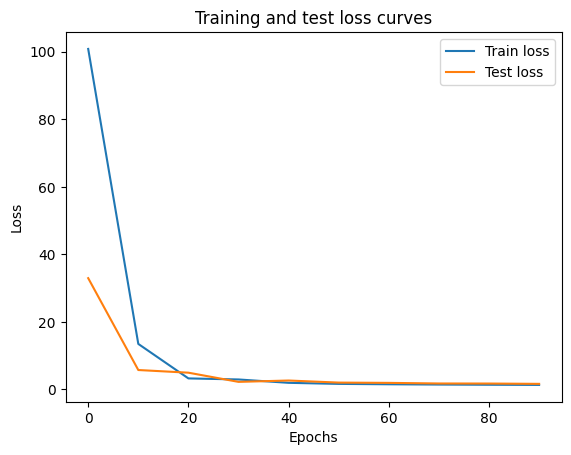

In [42]:
import matplotlib.pyplot as plt

plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

We can see in the graph that our train and test loss came down rapidly for the first 15 epochs and then for the next 10-15 epochs decreased slowly then stopped decreasing (almost except for few fluctuations).

Now let us move to visualizing the predictions!!!

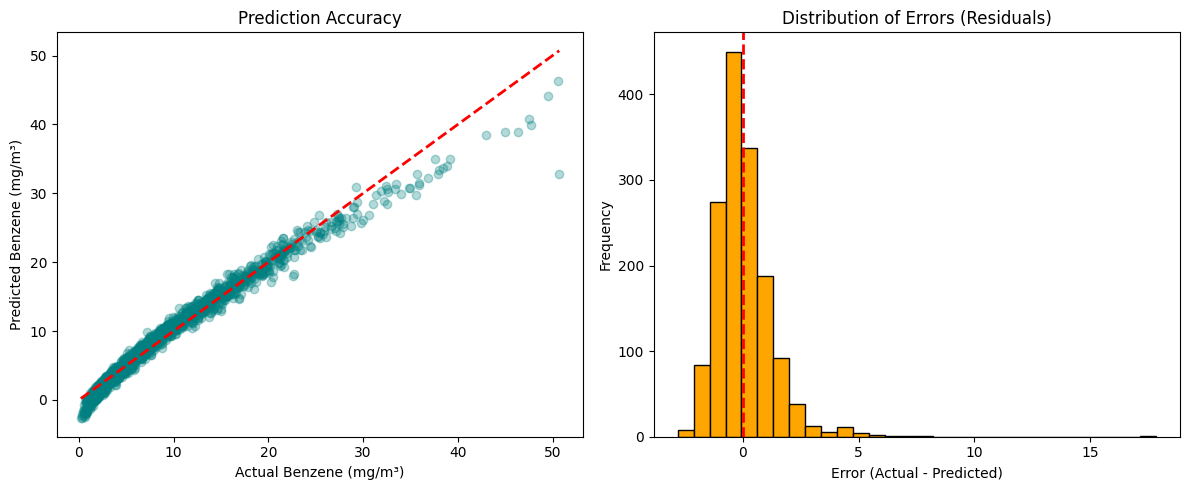

In [43]:
# 1. Get predictions
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test_tensor).cpu().numpy()

# 2. Convert ground truth to numpy for plotting
y_actual = y_test_tensor.cpu().numpy()

# 3. Create the Visualization
plt.figure(figsize=(12, 5))

# Plot 1: Scatter Plot (Actual vs Predicted)
plt.subplot(1, 2, 1)
plt.scatter(y_actual, y_preds, alpha=0.3, color='teal')
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
plt.title("Prediction Accuracy")
plt.xlabel("Actual Benzene (mg/m³)")
plt.ylabel("Predicted Benzene (mg/m³)")

# Plot 2: Residual Plot (The "Errors")
plt.subplot(1, 2, 2)
plt.hist(y_actual - y_preds, bins=30, color='orange', edgecolor='black')
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.title("Distribution of Errors (Residuals)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Observations:**
1. Our model's prediction and the actual values were almost identical for benzene levels from 0 to around 25, but after that they actually drift away.
2. Since dots are to the right of the redline (represents actual=predicted) it means that our model does not predict the benzene levels high enough for benezze levels from 25 (approximately).


**So what does this mean?** This means that as we are currently using just a linear model, let us introduce some non-linearity and possibly and extra layer or more hidden units or both and see how it goes, we can also decrease the learning rate to 0.01 as our current lr (0.1) is higher than normal.

## 6. Re-Iterating our approach and making a new model

Our goal in this re-iteration is to introduce non-linearity to our previously linear model and possibly tweak some hyper parameters to see how our model behaves. So let's dive into it.

### 6.1 Make a new model with ReLU in between the linear layers for some non-linearity.

In [44]:
class RegressionModelv1(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=16):
    super().__init__()
    self.layers_stacked = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        # nn.Linear(in_features=hidden_units, out_features=hidden_units), # Uncomment these 2 lines for 2 hidden layers
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.layers_stacked(x)

model_1 = RegressionModelv1(11, 1, 256).to(device) # 256 units per hidden layer
model_1

RegressionModelv1(
  (layers_stacked): Sequential(
    (0): Linear(in_features=11, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1, bias=True)
  )
)

### 6.2 Create a new loss function and optimizer

Let's stick to the same loss function and optimizer while in the optimizer lower the learning rate to 0.01 instead of 0.1 we used earlier.

In [45]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.01)

In [46]:
### 6.3 Device Agnostic code and moving data to target device.
device = "cuda" if torch.cuda.is_available() else "cpu" # cpu is the default for tensors created unless manually set to a cuda
device

'cuda'

In [47]:
# Move our data to the target device
X_train_tensor, y_train_tensor = X_train_tensor.to(device), y_train_tensor.to(device)
X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)

### 6.3 Create a Training and Testing loop

We have all of this code when we wrote our first model and this is the same code, we can write all of it in a class and put each of them in a function and reuse them. The only reason I am writing everything is for practice and to remember it.

In [48]:
epochs = 200

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  # Training
  model_1.train()

  # 1. Forward pass
  y_preds = model_1(X_train_tensor)

  # 2. Calculate the loss
  loss = loss_fn(y_preds, y_train_tensor)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Optmizer step
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_preds = model_1(X_test_tensor)
    test_loss = loss_fn(test_preds, y_test_tensor)

  if epoch % 10 == 0:
    train_loss_values.append(loss.cpu().detach().numpy())
    test_loss_values.append(test_loss.cpu().detach().numpy())
    epoch_count.append(epoch)
    print(f"Epoch: {epoch} | Train loss: {loss:.4f} | Test loss: {test_loss:.4f}")

Epoch: 0 | Train loss: 157.7168 | Test loss: 95.4928
Epoch: 10 | Train loss: 18.8074 | Test loss: 12.8313
Epoch: 20 | Train loss: 7.0445 | Test loss: 7.7279
Epoch: 30 | Train loss: 2.3723 | Test loss: 3.1913
Epoch: 40 | Train loss: 1.3326 | Test loss: 1.5836
Epoch: 50 | Train loss: 0.8711 | Test loss: 1.0163
Epoch: 60 | Train loss: 0.6400 | Test loss: 0.7546
Epoch: 70 | Train loss: 0.4848 | Test loss: 0.5172
Epoch: 80 | Train loss: 0.3512 | Test loss: 0.3721
Epoch: 90 | Train loss: 0.2740 | Test loss: 0.3019
Epoch: 100 | Train loss: 0.2153 | Test loss: 0.2597
Epoch: 110 | Train loss: 0.1723 | Test loss: 0.2076
Epoch: 120 | Train loss: 0.1410 | Test loss: 0.1804
Epoch: 130 | Train loss: 0.1181 | Test loss: 0.1537
Epoch: 140 | Train loss: 0.1010 | Test loss: 0.1364
Epoch: 150 | Train loss: 0.0880 | Test loss: 0.1219
Epoch: 160 | Train loss: 0.0778 | Test loss: 0.1097
Epoch: 170 | Train loss: 0.0696 | Test loss: 0.0997
Epoch: 180 | Train loss: 0.0631 | Test loss: 0.0915
Epoch: 190 | Train

### 6.4 Now let us visualize it and see what's going on

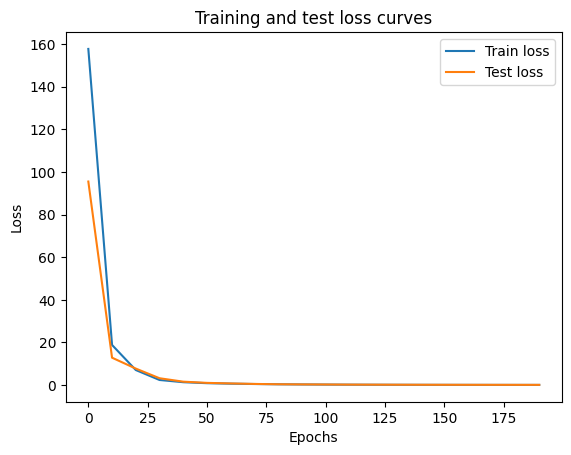

In [49]:
# Train vs Test loss
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

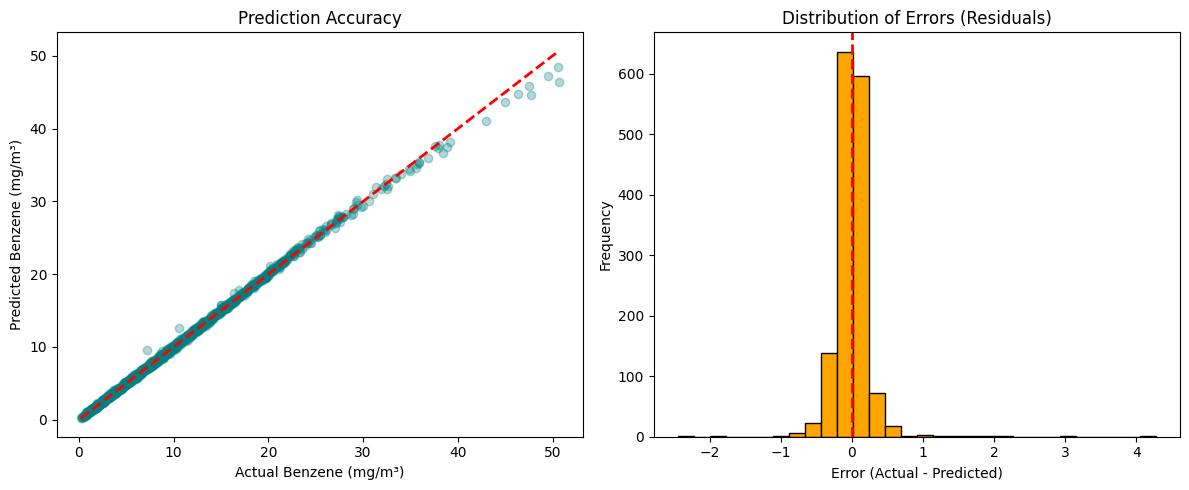

In [50]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_1(X_test_tensor).cpu().numpy()
# print(f"Y_preds shape: {y_preds.shape}")

y_actual = y_test_tensor.cpu().numpy()
# print(f"Y_actual shape: {y_actual.shape}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_actual, y_preds, alpha=0.3, color='teal')
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', lw=2)
plt.title("Prediction Accuracy")
plt.xlabel("Actual Benzene (mg/m³)")
plt.ylabel("Predicted Benzene (mg/m³)")

plt.subplot(1, 2, 2)
plt.hist(y_actual - y_preds, bins=30, color='orange', edgecolor='black')
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.title("Distribution of Errors (Residuals)")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [51]:
from sklearn.metrics import r2_score

model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test_tensor).cpu().numpy()
    y_true = y_test_tensor.cpu().numpy()

score = r2_score(y_true, y_preds)
print(f"Final Model R^2 Score: {score:.4f}")

Final Model R^2 Score: 0.9987


## 6.5 Summing up the Experiments

There are 10 different experiments I ran with both 1 hidden layer and 2 hidden layers and here is what the training loss, testing loss and the r2 score looks like. There is also the visualizations generated for each of the experiment which will be provided in **images/** in the root directory.

<table><thead>
  <tr>
    <th>Num of Hidden Layers</th>
    <th>Units per Hidden Layer</th>
    <th>Epochs</th>
    <th>Train Loss</th>
    <th>Test Loss</th>
    <th>R2 Score</th>
  </tr></thead>
<tbody>
  <tr>
    <td>1</td>
    <td>16</td>
    <td>200</td>
    <td>0.5522</td>
    <td>0.6084</td>
    <td>0.9893</td>
  </tr>
  <tr>
    <td>1</td>
    <td>32</td>
    <td>200</td>
    <td>0.2018</td>
    <td>0.2503</td>
    <td>0.9908</td>
  </tr>
  <tr>
    <td>1</td>
    <td>64</td>
    <td>200</td>
    <td>0.1765</td>
    <td>0.2196</td>
    <td>0.9961</td>
  </tr>
  <tr>
    <td>1</td>
    <td>128</td>
    <td>200</td>
    <td>0.0753</td>
    <td>0.1112</td>
    <td>0.9977</td>
  </tr>
  <tr>
    <td>1</td>
    <td>256</td>
    <td>200</td>
    <td>0.0424</td>
    <td>0.0583</td>
    <td>0.9991</td>
  </tr>
  <tr>
    <td>2</td>
    <td>16</td>
    <td>200</td>
    <td>06260</td>
    <td>0.7220</td>
    <td>0.9921</td>
  </tr>
  <tr>
    <td>2</td>
    <td>32</td>
    <td>200</td>
    <td>0.0964</td>
    <td>0.1239</td>
    <td>0.9962</td>
  </tr>
  <tr>
    <td>2</td>
    <td>64</td>
    <td>200</td>
    <td>0.1011</td>
    <td>0.1195</td>
    <td>0.9967</td>
  </tr>
  <tr>
    <td>2</td>
    <td>128</td>
    <td>200</td>
    <td>0.0628</td>
    <td>0.0863</td>
    <td>0.9986</td>
  </tr>
  <tr>
    <td>2</td>
    <td>256</td>
    <td>200</td>
    <td>0.0308</td>
    <td>0.0471</td>
    <td>0.9992</td>
  </tr>
</tbody></table>

**Final Results:**
* Based on the results in the table the best performing model for me was the one with 1-layer and 256 hidden units (neurons).
* Althought all the models R2 score was pretty good we should also be checking both the train and test losses too.
* Upon multiple repetetions for 1-layer 256 units and 2-layer 256 units models the training loss weas swinging between 0.03 and 0.05 while the test loss between 0.04 and 0.05.
* So an addition layer with 256 units for a meagre increases in r2-score did not seem like a great trade for me for that increase in compute, so the 1-layer and 256 hidden units model would be the one I would use for my use case.
* Althought the model selected would be primarily dependent on use case, if you need a lighter model the 2-layer and 32 unit model would be great as it is much lighter (less than half the size) than our final model (1-layer 256 units).

**NOTE:** Everytime you run the experiment there will be different results and it is pretty common, it happened to me and will happen to you.

## 7. Save the Model

So before we wrap up let us save the state dict of the model, so we can load it any time and work with it rather than building the same model everytime we want to use.

In [52]:
# Create a path to save the model.
model_path = "regression_model.pth"
torch.save(model_1.state_dict(), model_path)

Cheers!!! We completed building a regression model to predict the amount of benzene.